NameError: name 'T_gas' is not defined

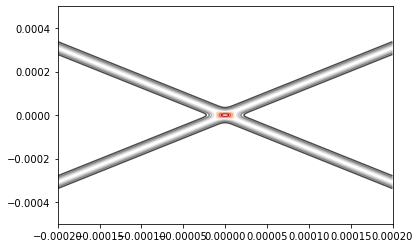

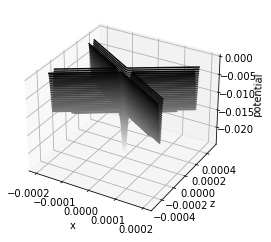

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

## fundamental constants
epsilon = 8.8541878128*10**(-12)
c = 3*10**8
k_B = 1.380649*10**(-23)

## exparimental parameters
#beam_waist = 50 * 10**(-6)
beam_waist = 25 * 10**(-6)
laser_wavelength = 1070*10**(-9)
li6_frequency = 446.789634*10**12 #https://jet.physics.ncsu.edu/techdocs/pdf/PropertiesOfLi.pdf
Gamma = 36.898*10**6 #https://jet.physics.ncsu.edu/techdocs/pdf/PropertiesOfLi.pdf
P = 200
n = 1 #refractive index of medium
#ang = math.atan(0.48/2.06)
ang = 20;

## calculated quantities
omega = 2 * math.pi*c/laser_wavelength
omega_0 = 2 * math.pi*li6_frequency
alpha = 6*math.pi*epsilon*c**3*Gamma/omega_0**2/(omega_0**2-omega**2-(omega**3/omega_0**2)*Gamma*1j)
z_R = math.pi*beam_waist**2*n/laser_wavelength
I_0 = P/(math.pi*beam_waist**2/2)

## potential of a beam propogating along the z axis
def beam(x, z):
    spot_size = beam_waist*math.sqrt(1 + (z/z_R)**2)
    I = I_0*(beam_waist/spot_size)**2*math.exp(-2*(x*math.sqrt(2))**2/(spot_size**2))
    U_dip = -1/(2*epsilon*c)*alpha.real*I/k_B
    return U_dip

## potential of a beam propogating in the x-z plane rotated theta radians from the x axis
def beam_rot(x, z, theta):
    x1 = x*math.cos(theta) - z*math.sin(theta)
    z1 = x*math.sin(theta) + z*math.cos(theta)
    return beam(x1, z1)

beam_rot = np.vectorize(beam_rot)

## 2D contour plot
x = np.linspace(-0.0002, 0.0002, 500)
z = np.linspace(-0.0005, 0.0005, 500)
X, Z = np.meshgrid(x, z)
potential = beam_rot(X, Z, -ang/2) + beam_rot(X, Z, ang/2)
plt.contour(X, Z, potential, 10, cmap='RdGy',extent=[-0.0002, 0.0002, -0.0005, 0.0005])
#plt.imshow(potential, extent=[-0.0005, 0.0005, -0.0005, 0.0005])

## 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Z, potential, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('potential');

## calculating
U_0 = beam(0, 0)

waist_x = beam_waist/math.cos(ang/2)
waist_y = beam_waist
waist_z = beam_waist/math.sin(ang/2)

thermal_r_x = math.sqrt(k_B * T_gas /(4*U_0)) * waist_x
thermal_r_y = math.sqrt(k_B * T_gas /(4*U_0)) * waist_y
thermal_r_z = math.sqrt(k_B * T_gas /(4*U_0)) * waist_z